# Finding potential Superhosts based on various features!

In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly
import cufflinks 
%matplotlib inline

# Reading Data and doing little bit of data exploration!

In [2]:
df= pd.read_csv('RecommendListings.csv')

In [3]:
df.head()

,id,name,host_id,host_response_rate,host_is_superhost,host_total_listings_count,host_verifications,city,latitude,longitude,...,minimum_nights,maximum_nights,number_of_reviews,requires_license,instant_bookable,cancellation_policy,guest_score,final_rev_score,booked,price
0,2078,Central comfy close to Metro Laurie,2277,0.0,0,1,6,Montreal,45.53069,-73.58588,...,2,7,245,0,1,2,0,9.55,0.279452,38
1,2843,Fabulous downtown/airport room,2319,1.0,0,5,7,Montreal,45.48442,-73.57923,...,1,365,139,0,1,1,0,9.20,0.224658,31
2,14584,"Spread Out in 1,200 Square Feet of Luxury in t...",57358,1.0,1,1,8,Montreal,45.54135,-73.57814,...,3,1125,166,0,0,0,0,9.90,0.060274,175
3,29059,Lovely studio Quartier Latin,125031,1.0,0,3,8,Montreal,45.51888,-73.56546,...,3,60,307,0,0,1,0,9.60,0.134247,94
4,29061,Maison historique - Quartier Latin,125031,1.0,0,3,8,Montreal,45.52020,-73.56422,...,3,21,56,0,1,1,0,9.40,0.060274,145


In [4]:
df.shape

(47646, 31)

# Importing Dataframe which contains sentiment score of the listings calculated by all the reviews recieved so far!

In [5]:
df1=pd.read_csv('SentimentScore.csv')

In [6]:
df1.rename(columns={'listing_id':'id'}, inplace=True)

In [7]:
df=df.set_index('id').join(df1.set_index('id'))

In [8]:
df=df.dropna(how='any')

In [9]:
df.shape

(39729, 31)

In [10]:
df.reset_index()

,id,name,host_id,host_response_rate,host_is_superhost,host_total_listings_count,host_verifications,city,latitude,longitude,...,maximum_nights,number_of_reviews,requires_license,instant_bookable,cancellation_policy,guest_score,final_rev_score,booked,price,sentiment_score
0,2078,Central comfy close to Metro Laurie,2277,0.00,0,1,6,Montreal,45.53069,-73.58588,...,7,245,0,1,2,0,9.55,0.279452,38,0.399377
1,2843,Fabulous downtown/airport room,2319,1.00,0,5,7,Montreal,45.48442,-73.57923,...,365,139,0,1,1,0,9.20,0.224658,31,0.349046
2,14584,"Spread Out in 1,200 Square Feet of Luxury in t...",57358,1.00,1,1,8,Montreal,45.54135,-73.57814,...,1125,166,0,0,0,0,9.90,0.060274,175,0.424510
3,29059,Lovely studio Quartier Latin,125031,1.00,0,3,8,Montreal,45.51888,-73.56546,...,60,307,0,0,1,0,9.60,0.134247,94,0.347272
4,29061,Maison historique - Quartier Latin,125031,1.00,0,3,8,Montreal,45.52020,-73.56422,...,21,56,0,1,1,0,9.40,0.060274,145,0.372003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39724,38461625,Cozy Suite off Broadway,293239954,0.00,0,0,1,Vancouver,49.26342,-123.04962,...,40,3,1,1,2,0,8.80,0.550685,101,0.373199
39725,38465573,"cute room in a big house, 20 min to Downtown/YVR",276943447,1.00,0,3,3,Vancouver,49.25015,-123.11102,...,1125,2,1,0,2,0,10.00,0.994521,26,0.760000
39726,38468034,Trendy Loft In The Heart Of Downtown!,293296720,0.00,0,1,6,Vancouver,49.28091,-123.10872,...,1125,1,1,1,0,0,5.72,0.024658,249,0.316667
39727,38519854,Bingbing's Awesome Home - Room 2,291070608,1.00,0,1,6,Vancouver,49.21404,-123.10400,...,30,1,1,1,2,0,10.00,0.010959,101,0.568333


In [14]:
#Removing useless columns, here host_id
df=df.drop(columns=['host_id','name'],axis=1)

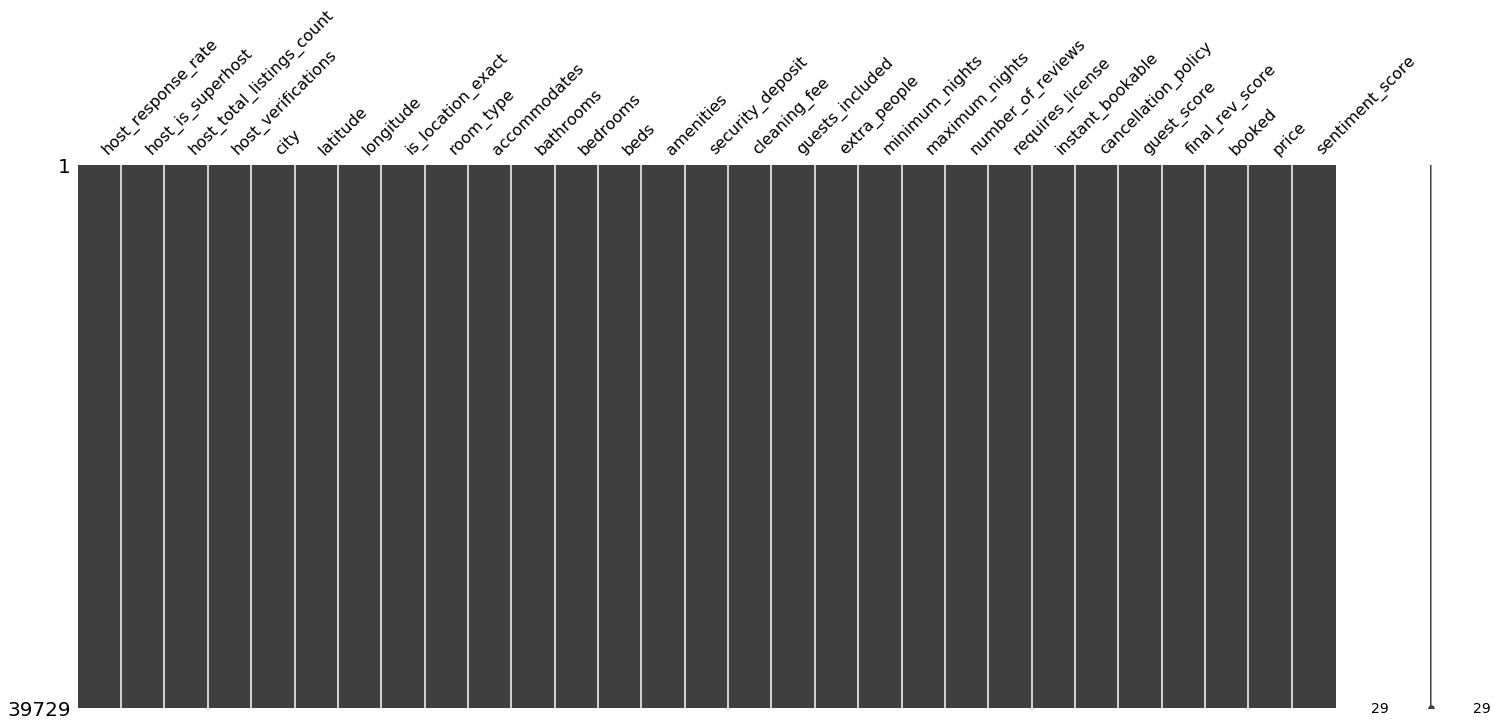

In [15]:
#checking if there is any missing value in the data!!
msno.matrix(df)

# categorical data to dummy variable or encoding!

In [16]:
df=pd.get_dummies(df, columns=['city'])

In [17]:
df=pd.get_dummies(df, columns=['room_type'])

# To avoid dummy variable trap, we need to drop one column each from dummy variables!

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39729 entries, 2078 to 38573149
Data columns (total 34 columns):
host_response_rate           39729 non-null float64
host_is_superhost            39729 non-null int64
host_total_listings_count    39729 non-null int64
host_verifications           39729 non-null int64
latitude                     39729 non-null float64
longitude                    39729 non-null float64
is_location_exact            39729 non-null int64
accommodates                 39729 non-null int64
bathrooms                    39729 non-null float64
bedrooms                     39729 non-null int64
beds                         39729 non-null int64
amenities                    39729 non-null int64
security_deposit             39729 non-null int64
cleaning_fee                 39729 non-null int64
guests_included              39729 non-null int64
extra_people                 39729 non-null int64
minimum_nights               39729 non-null int64
maximum_nights             

In [19]:
df=df.drop(columns=['room_type_Shared room','city_Vancouver'],axis=1)

# I want the column 'host_is_superhost' in the end for easily extracting it after Normalization!

In [20]:
cols = list(df.columns.values) 
cols.pop(cols.index('host_is_superhost'))
df = df[cols+['host_is_superhost']]

In [21]:
df.shape

(39729, 32)

# Pre-processing of the data!

In [22]:
data=df.values

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()

In [25]:
scaler.fit(data)

MinMaxScaler(copy=True, feature_range=(0, 1))

# Splitting data into X and y

In [26]:
y=data[:,-1]

In [27]:
X=data[:,:-1]

In [28]:
X.shape

(39729, 31)

In [29]:
y.shape

(39729,)

In [30]:
type(X)

numpy.ndarray

In [31]:
type(y)

numpy.ndarray

# Splitting data into Train, Validation and Testing set!!  [0.64 , 0.16 , 0.2]

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

# KNN Classifier!

In [33]:
from sklearn.neighbors import  KNeighborsClassifier
clf= KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
clf.score(X_val,y_val)

0.7374547742645902

# RandomForest Classifier!

In [34]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
clf.fit(X_train,y_train)
clf.score(X_val,y_val)

0.8406481044517854

# Adaboost Classifier!

In [35]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=10)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8278379058645859

# Support Vector Machine Classifier!

In [36]:
from sklearn import svm
clf = svm.SVC(gamma='scale')
clf.fit(X_train, y_train)  
clf.score(X_test,y_test)

0.7118046816008055

# logistic Regression Classifier!

In [37]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train, y_train)
clf.fit(X_train,y_train)
clf.score(X_val,y_val)

0.73147711184521

# Since, RF classifier outperformed everyone. Thus, tuning RF classifier!

In [38]:
RFscores={}
for i in range(10,250,10):
    clf = RandomForestClassifier(n_estimators=i, max_depth=None,min_samples_split=2, random_state=0)
    clf.fit(X_train,y_train)
    val=clf.score(X_val,y_val)
    RFscores[i]=val
    
    

In [39]:
x_axis= [i for i in range(10,250,10)]
y_axis=list(RFscores.values())

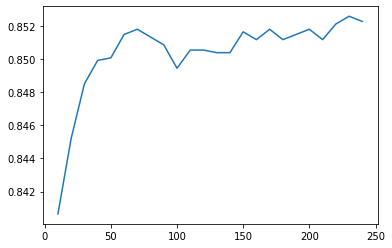

In [40]:
plt.plot(x_axis,y_axis)

In [41]:
index_max=max(RFscores, key=RFscores.get)

In [42]:
index_max

230

In [57]:
clf = RandomForestClassifier(n_estimators=230, max_depth=None,min_samples_split=2, random_state=0)
clf.fit(X_train,y_train)
clf.score(X_val,y_val)

0.8526034292905459

In [58]:
clf.score(X_test,y_test)

0.8579159325446766

# 85.79% on Testing set! using Random Forest Classifier!

# Identifying Important Features Which makes a Host -> Superhost

In [47]:
for name, importance in zip(df.columns[:-1],clf.feature_importances_):
    print(name, "=", importance)

host_response_rate = 0.0624533067687104
host_total_listings_count = 0.053087722447950125
host_verifications = 0.03461564751663985
latitude = 0.04889242020914155
longitude = 0.04837553330302762
is_location_exact = 0.0061064204014316895
accommodates = 0.018396556372696226
bathrooms = 0.009678242983956609
bedrooms = 0.008158638402641232
beds = 0.01286098781833549
amenities = 0.024736136855762272
security_deposit = 0.02803440028915827
cleaning_fee = 0.038180583953053425
guests_included = 0.01357878817632716
extra_people = 0.025084332488243866
minimum_nights = 0.026577589672196165
maximum_nights = 0.025379308817167743
number_of_reviews = 0.15844792814955824
requires_license = 0.002921916099653314
instant_bookable = 0.008164205690879037
cancellation_policy = 0.01347669269843341
guest_score = 0.002292114054478228
final_rev_score = 0.15709330196267912
booked = 0.046539735698392454
price = 0.04166536932777489
sentiment_score = 0.06655681456626238
city_Montreal = 0.004184991690019574
city_Torron

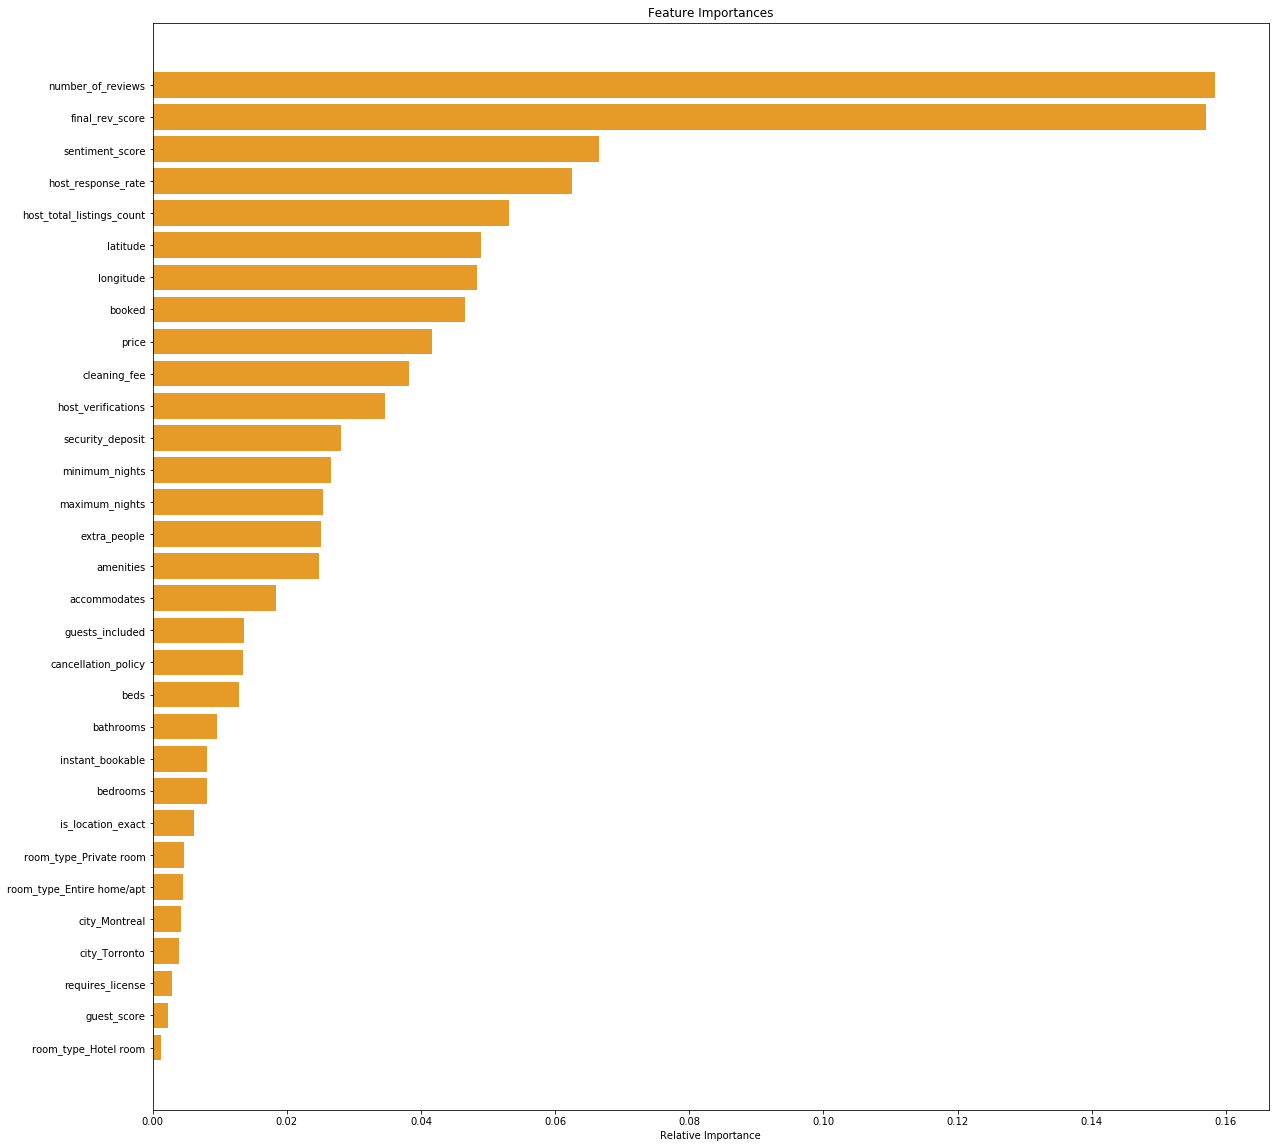

In [48]:

plt.figure(figsize=(20,20))
features = df.columns[:-1]
importances = clf.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='#E69B29', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Thank you!